# <center> MM-520 Programación Matemática II – Profesor: Henry Ocampo
</center>
<center> MM-520 Proyecto  – Alumno: Henrry Molina
</center>

In [1]:
import numpy as np
import math
import sys
import matplotlib.pyplot as plt
from tabulate import tabulate
import pandas as pd
from PIL import Image, ImageDraw, ImageFont

Montar Drive, para poder acceder al archivo yk.txt

In [2]:
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


Funcion para graficar el $x^*$ y el vector $y$

In [3]:
def grafica(datos,datos2, title):
  plt.figure(figsize=(7,4))
  plt.plot(datos,label = "x*")
  plt.plot(datos2,label = "y")
  plt.title(title)
  plt.legend()
  plt.show()
  print("\n")

#$ f :R^n\rightarrow R$ , definida como: $$f(x) =\sum_{i=1}^{n}(x_{i}-y_{i})^2 +\lambda \sum_{i=1}^{n-1}(x_{i+1} -x_{i})^2$$, donde $y \in R^n$, $ \lambda \in R$ son constantes.  Gradiente y Hessiano de la función

# <center> Funcion, Gradiente y Hessiano

---



In [4]:
#Funcion
def fd(x, y, A):
  suma1 = 0
  for i in range(257):
    if i <= 257:
      suma1 = suma1 + (x[i]-y[i])**2
    suma2=0
  for i in range(256):
    if i <= 256:
      suma2 = suma2 + A*(x[i+1]-x[i])**2
  return  suma1+ suma2

#Gradiente
def gd(x, y, A):
    grad = np.zeros_like(x)

    grad[0] = 2 * (x[0] - y[0]) + 2 * A * (x[0] - x[1])

    for i in range(len(x) - 1):
        grad[i] = 2 * (x[i] - y[i]) + 2 * A * (2 * x[i] - x[i - 1] - x[i + 1])


    grad[len(x) - 1] = 2 * (x[len(x) - 1] - y[len(x) - 1]) + 2 * A * (x[len(x) - 1] - x[len(x) - 2])

    return grad

# Hessiano
def hd(x,y,A):
    H = np.zeros((len(x), len(x)))

    H[0][0] = 2 + 2 * A
    H[0][1] = -2 * A

    for i in range(1, len(x) - 1):
        H[i][i - 1] = -2 * A
        H[i][i] = 2 + 4 * A
        H[i][i + 1] = -2 * A

    H[len(x) - 1][len(x) - 2] = -2 * A
    H[len(x) - 1][len(x) - 1] = 2 + 2 * A

    return H

# <center> Criterio de alto, paso y el algortimo del descenso del gradiente.
---



In [42]:
#Criterio de alto
def criterio_alto(xk, f, gradient_f, t_g, k, K_max, case,y,A):

   #Criterio #1
   if case == 1:
       if k> K_max:
        return True
       else:
        return False

    #Criterio #4
   elif case == 4:
    return np.linalg.norm(gradient_f(xk,y,A)) < t_g

# Tamaño de paso
def tamaño_paso(xk, g, paso,a,p,c1, f, gradient_f, HF, y, A):
    if paso == "exacto":
        a = 10**-4
        return a
    if paso == "Grad_Hess":
        alph = (gradient_f(xk, y, A) @ gradient_f(xk, y, A)) / (gradient_f(xk, y, A) @ HF(xk, y, A) @ gradient_f(xk, y, A))
        return alph
    if paso == "backtracking":
        while f(xk + a * (g), y, A) > f(xk,y,A) + c1*a*gradient_f(xk,y,A).T @g:
            a *= p

        return a

#Algorirmo de Gradiente Descendente
def descenso_gradiente(xk, f, gradient_f, HF, t_g, K_max, case, paso,a,p,c1,y,A):
    k = 0
    data = []    # Lista para almacenar los resultados
    while True:
      g = -gradient_f(xk,y,A)
      a = tamaño_paso(xk,g, paso,a,p,c1 ,f, gradient_f, HF,y,A)
      #print(a)
      xk1 = xk + a * g             #xk1 == x_k+1


      # Registrar los resultados en la lista data
      norm_dif = np.linalg.norm(xk1 - xk)
      norm_grad = np.linalg.norm(g)
      fxk = f(xk, y, A)
      data.append([k, norm_dif, norm_grad, fxk])

      xk = xk1

      if criterio_alto(xk1, f, gradient_f, t_g, k, K_max, case,y,A) == True:
        break;
      #print("Norma", np.linalg.norm(gradient_f(xk,y,A)))   # Ver comportamiento de la norma
      k += 1

      df = pd.DataFrame(data, columns=["k", "||X_K+1 - X_K||", "||∇f(x_k)||", "f(x_k)"])

    return xk, df #Retorna el punto optimo


# <center> Resultados de aplicar Gradiente Descendente </center>

# <center> **Exacto**

---



# Gradiente Descenso (Exacto con $λ$ = 1)



|            k |   ||X_K+1 - X_K|| |   ||∇f(x_k)|| |          f(x_k) |
|-------------:|------------------:|--------------:|----------------:|
|    0.0000000 |         4.7171232 |  4717.1232324 | 5563174.7715204 |
|    1.0000000 |         4.7074426 |  4707.4425867 | 5540945.4889461 |
|    2.0000000 |         4.6977836 |  4697.7835892 | 5518807.0515064 |
| 8807.0000000 |         0.0000001 |     0.0001007 |   54183.0299071 |
| 8808.0000000 |         0.0000001 |     0.0001005 |   54183.0299065 |
| 8809.0000000 |         0.0000001 |     0.0001003 |   54183.0299059 |




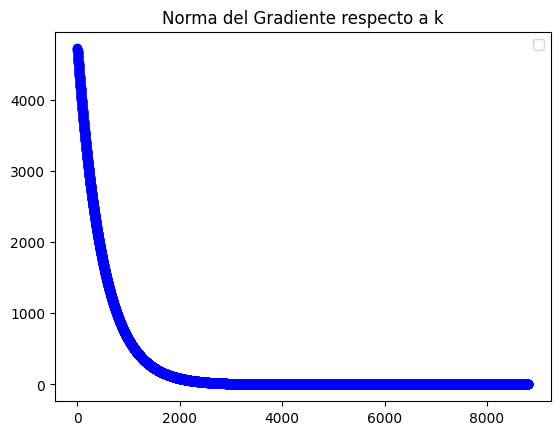

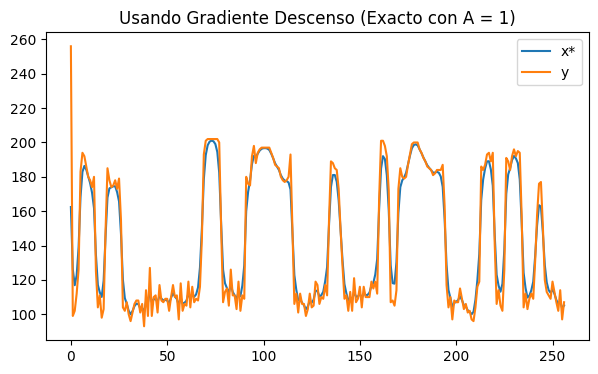

In [28]:
def show_table():
    xk = np.random.rand(257)  # Vector x de ejemplo
    y = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/yk .txt', delimiter=",")

    K_max = 10000
    t_g = 1e-4
    A = 1
    case = 4
    paso = "exacto"


    datos_optimizacion, tabla_completa = descenso_gradiente(xk, fd, gd, hd, t_g, K_max, case, paso,0.1,0.3,0.2, y, A)
    print("\n")
    df = pd.concat([tabla_completa.head(3), tabla_completa.tail(3)])
    tabla = tabulate(df, headers="keys", tablefmt="pipe", showindex=False, floatfmt=".7f")


    # Imprimir la tabla en formato LaTeX con líneas
    print(tabla)


    print("\n")
    plt.plot(tabla_completa['k'], tabla_completa['||∇f(x_k)||'], marker='o', linestyle='--', color='blue')
    plt.title('Norma del Gradiente respecto a k')
    plt.legend()
    plt.grid(False)
    plt.show()

    print(" ")
    grafica(datos_optimizacion, y, "Usando Gradiente Descenso (Exacto con A = 1)")
    print("\n")



show_table()

# Gradiente Descenso (Exacto con $λ$ = 100)



|             k |   ||X_K+1 - X_K|| |   ||∇f(x_k)|| |          f(x_k) |
|--------------:|------------------:|--------------:|----------------:|
|     0.0000000 |         5.3480950 |  5348.0950336 | 5569538.5702933 |
|     1.0000000 |         4.7692453 |  4769.2453387 | 5543190.0697838 |
|     2.0000000 |         4.6884162 |  4688.4161847 | 5520681.0369224 |
| 11106.0000000 |         0.0000000 |     0.0000010 |  297734.6926692 |
| 11107.0000000 |         0.0000000 |     0.0000010 |  297734.6926692 |
| 11108.0000000 |         0.0000000 |     0.0000010 |  297734.6926691 |




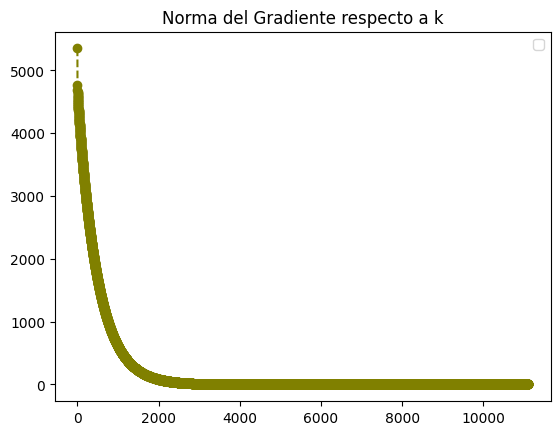

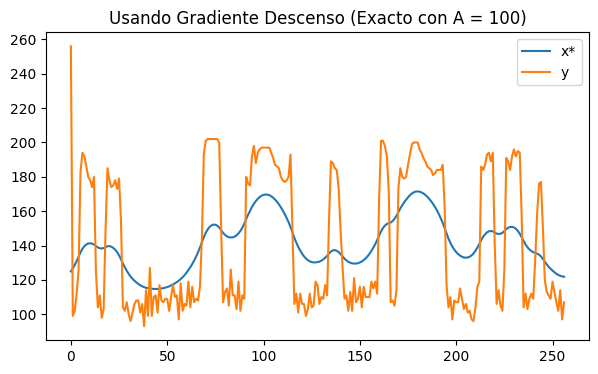

In [30]:
def show_table():
    xk = np.random.rand(257)  # Vector x de ejemplo
    y = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/yk .txt', delimiter=",")

    K_max = 10000
    t_g = 1e-6
    A = 100
    case = 4
    paso = "exacto"


    datos_optimizacion, tabla_completa = descenso_gradiente(xk, fd, gd, hd, t_g, K_max, case, paso,0.1,0.3,0.2, y, A)
    print("\n")
    df = pd.concat([tabla_completa.head(3), tabla_completa.tail(3)])
    tabla = tabulate(df, headers="keys", tablefmt="pipe", showindex=False, floatfmt=".7f")

    print(tabla)


    print("\n")
    plt.plot(tabla_completa['k'], tabla_completa['||∇f(x_k)||'], marker='o', linestyle='--', color='olive')
    plt.title('Norma del Gradiente respecto a k')
    plt.legend()
    plt.grid(False)
    plt.show()

    print(" ")
    grafica(datos_optimizacion, y, "Usando Gradiente Descenso (Exacto con A = 100)")
    print("\n")



show_table()

# Gradiente Descenso (Exacto con $λ$ = 1000)



|             k |   ||X_K+1 - X_K|| |   ||∇f(x_k)|| |          f(x_k) |
|--------------:|------------------:|--------------:|----------------:|
|     0.0000000 |         2.1893294 | 21893.2938375 | 5599684.9350171 |
|     1.0000000 |         0.8853648 |  8853.6477491 | 5567657.9514137 |
|     2.0000000 |         0.6013474 |  6013.4740823 | 5561439.7057709 |
| 65163.0000000 |         0.0000010 |     0.0100073 |  372085.5365083 |
| 65164.0000000 |         0.0000010 |     0.0100053 |  372085.5364897 |
| 65165.0000000 |         0.0000010 |     0.0100033 |  372085.5364711 |




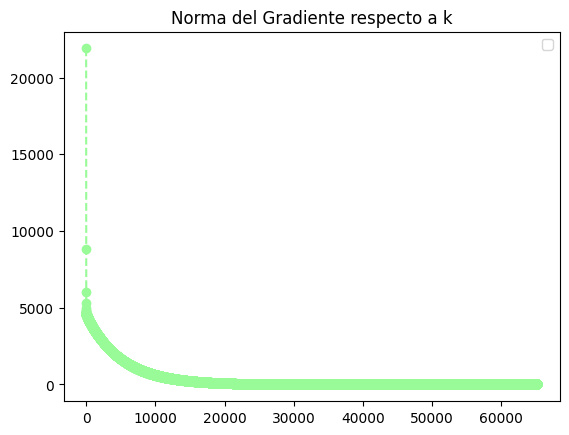

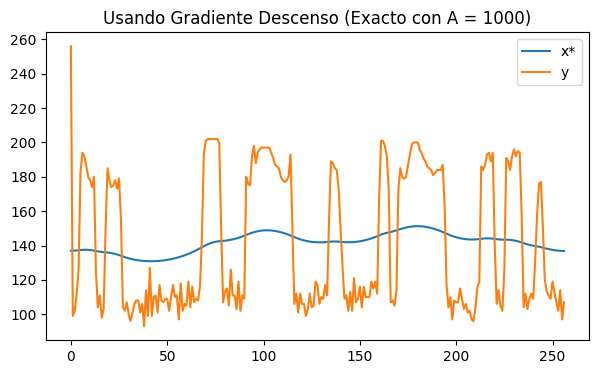

In [44]:
def show_table():
    xk = np.random.rand(257)  # Vector x de ejemplo
    y = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/yk .txt', delimiter=",")

    K_max = 10000
    t_g = 1e-2
    A = 1000
    case = 4
    paso = "exacto"


    datos_optimizacion, tabla_completa = descenso_gradiente(xk, fd, gd, hd, t_g, K_max, case, paso,0.1,0.3,0.2, y, A)
    print("\n")
    df = pd.concat([tabla_completa.head(3), tabla_completa.tail(3)])
    tabla = tabulate(df, headers="keys", tablefmt="pipe", showindex=False, floatfmt=".7f")
    print(tabla)


    print("\n")
    plt.plot(tabla_completa['k'], tabla_completa['||∇f(x_k)||'], marker='o', linestyle='--', color='palegreen')
    plt.title('Norma del Gradiente respecto a k')
    plt.legend()
    plt.grid(False)
    plt.show()

    print(" ")
    grafica(datos_optimizacion, y, "Usando Gradiente Descenso (Exacto con A = 1000)")
    print("\n")



show_table()

# <center> **Gradiente Hessiano**

---



---



# Gradiente Descenso (Grad-Hess con $λ$ = 1)



|          k |   ||X_K+1 - X_K|| |   ||∇f(x_k)|| |          f(x_k) |
|-----------:|------------------:|--------------:|----------------:|
|  0.0000000 |      2313.2052588 |  4718.0972885 | 5564505.1501545 |
|  1.0000000 |       143.6566331 |   998.1993333 |  107747.2793207 |
|  2.0000000 |        40.0284110 |   292.8701132 |   61472.3554039 |
| 42.0000000 |         0.0000006 |     0.0000043 |   54183.0296218 |
| 43.0000000 |         0.0000005 |     0.0000023 |   54183.0296190 |
| 44.0000000 |         0.0000003 |     0.0000018 |   54183.0296169 |




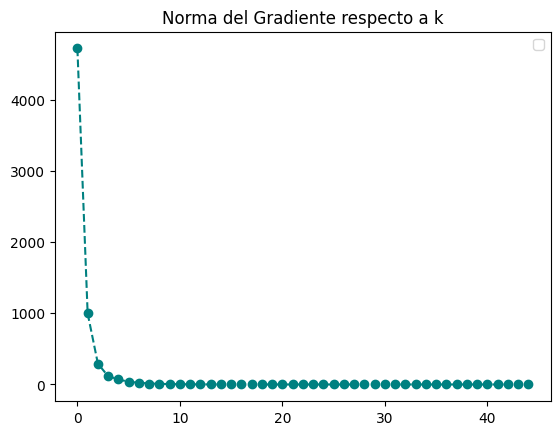

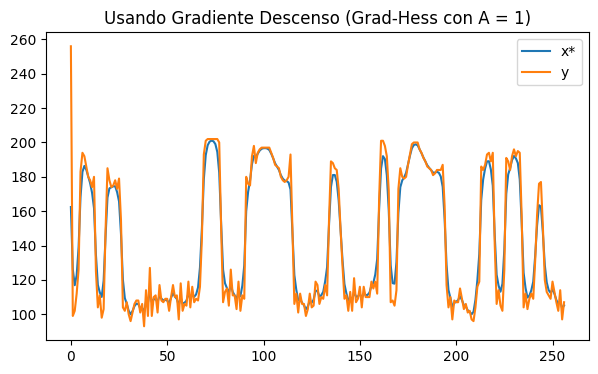

In [31]:
def show_table():
    xk = np.random.rand(257)  # Vector x de ejemplo
    y = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/yk .txt', delimiter=",")

    K_max = 10000
    t_g = 1e-6
    A = 1
    case = 4

    paso = "Grad_Hess"
    #paso = "backtracking"

    datos_optimizacion, tabla_completa = descenso_gradiente(xk, fd, gd, hd, t_g, K_max, case, paso,0.1,0.2,0.3 ,y, A)
    print("\n")
    df = pd.concat([tabla_completa.head(3), tabla_completa.tail(3)])
    tabla = tabulate(df, headers="keys", tablefmt="pipe", showindex=False, floatfmt=".7f")
    print(tabla)


    print("\n")
    plt.plot(tabla_completa['k'], tabla_completa['||∇f(x_k)||'], marker='o', linestyle='--', color='#008080')
    plt.title('Norma del Gradiente respecto a k')
    plt.legend()
    plt.grid(False)
    plt.show()

    print(" ")
    grafica(datos_optimizacion, y, "Usando Gradiente Descenso (Grad-Hess con A = 1)")
    print("\n")



show_table()

# Gradiente Descenso (Grad-Hess con $λ$ = 100)



|            k |   ||X_K+1 - X_K|| |   ||∇f(x_k)|| |          f(x_k) |
|-------------:|------------------:|--------------:|----------------:|
|    0.0000000 |        43.3443311 |  5178.9692991 | 5568018.3646858 |
|    1.0000000 |        18.5458540 | 11214.7739444 | 5455538.9786602 |
|    2.0000000 |        28.6366702 |  5219.7550023 | 5351649.1429284 |
| 2406.0000000 |         0.0000000 |     0.0000010 |  297734.6926682 |
| 2407.0000000 |         0.0000000 |     0.0000025 |  297734.6926679 |
| 2408.0000000 |         0.0000000 |     0.0000010 |  297734.6926679 |




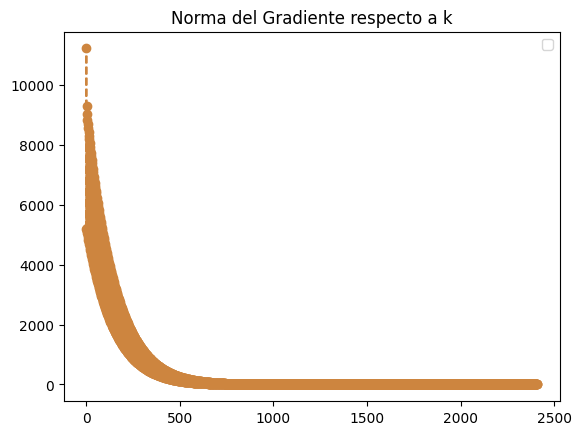

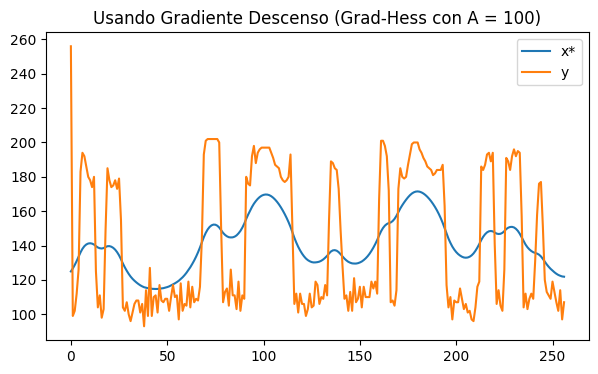

In [32]:
def show_table():
    xk = np.random.rand(257)  # Vector x de ejemplo
    y = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/yk .txt', delimiter=",")

    K_max = 10000
    t_g = 1e-6
    A = 100
    case = 4

    paso = "Grad_Hess"
    #paso = "backtracking"

    datos_optimizacion, tabla_completa = descenso_gradiente(xk, fd, gd, hd, t_g, K_max, case, paso,0.1,0.2,0.3, y, A)
    print("\n")
    df = pd.concat([tabla_completa.head(3), tabla_completa.tail(3)])
    tabla = tabulate(df, headers="keys", tablefmt="pipe", showindex=False, floatfmt=".7f")
    print(tabla)


    print("\n")
    plt.plot(tabla_completa['k'], tabla_completa['||∇f(x_k)||'], marker='o', linestyle='--', color='peru')
    plt.title('Norma del Gradiente respecto a k')
    plt.legend()
    plt.grid(False)
    plt.show()

    print(" ")

    print("\n")
    grafica(datos_optimizacion, y, "Usando Gradiente Descenso (Grad-Hess con A = 100)")

show_table()

# Descenso gradiente (Grad-Hess con $λ = 1000)



|             k |   ||X_K+1 - X_K|| |   ||∇f(x_k)|| |          f(x_k) |
|--------------:|------------------:|--------------:|----------------:|
|     0.0000000 |         3.5409790 | 22371.7696836 | 5605056.1229809 |
|     1.0000000 |         2.5748359 |  7141.1261209 | 5565377.0930125 |
|     2.0000000 |         1.6423710 |  7917.2988125 | 5556098.9799428 |
| 30371.0000000 |         0.0000003 |     0.0010011 |  372085.4507187 |
| 30372.0000000 |         0.0000003 |     0.0011751 |  372085.4507145 |
| 30373.0000000 |         0.0000003 |     0.0010001 |  372085.4507114 |




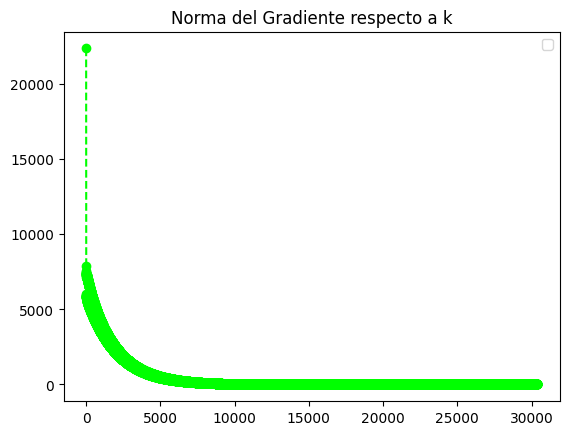

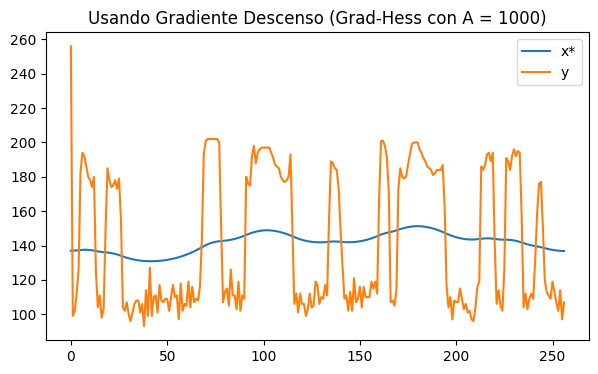

In [40]:
def show_table():
    xk = np.random.rand(257)  # Vector x de ejemplo
    y = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/yk .txt', delimiter=",")

    K_max = 10000
    t_g = 1e-3
    A = 1000
    case = 4

    paso = "Grad_Hess"
    #paso = "backtracking"

    datos_optimizacion, tabla_completa = descenso_gradiente(xk, fd, gd, hd, t_g, K_max, case, paso,0.1,0.1,0.1, y, A)
    print("\n")
    df = pd.concat([tabla_completa.head(3), tabla_completa.tail(3)])
    tabla = tabulate(df, headers="keys", tablefmt="pipe", showindex=False, floatfmt=".7f")
    print(tabla)


    print("\n")
    plt.plot(tabla_completa['k'], tabla_completa['||∇f(x_k)||'], marker='o', linestyle='--', color='lime')
    plt.title('Norma del Gradiente respecto a k')
    plt.legend()
    plt.grid(False)
    plt.show()

    print(" ")

    print("\n")
    grafica(datos_optimizacion, y, "Usando Gradiente Descenso (Grad-Hess con A = 1000)")

show_table()

# <center>**Backtracking**

---



#Gradiente Descenso (backtracking con $λ$ = 1)



|          k |   ||X_K+1 - X_K|| |   ||∇f(x_k)|| |          f(x_k) |
|-----------:|------------------:|--------------:|----------------:|
|  0.0000000 |      2359.0072067 |  4718.0144134 | 5564988.7340070 |
|  1.0000000 |       126.3449584 |  1010.7596675 |  108605.7684919 |
|  2.0000000 |        30.7172703 |   245.7381621 |   58896.7977495 |
| 47.0000000 |         0.0000038 |     0.0000304 |   54183.0296480 |
| 48.0000000 |         0.0000028 |     0.0000223 |   54183.0296393 |
| 49.0000000 |         0.0000021 |     0.0000164 |   54183.0296327 |




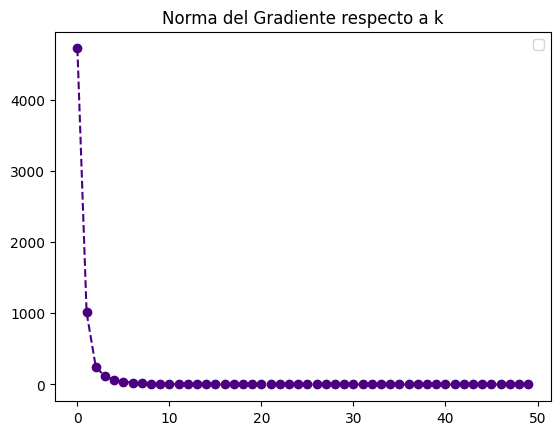

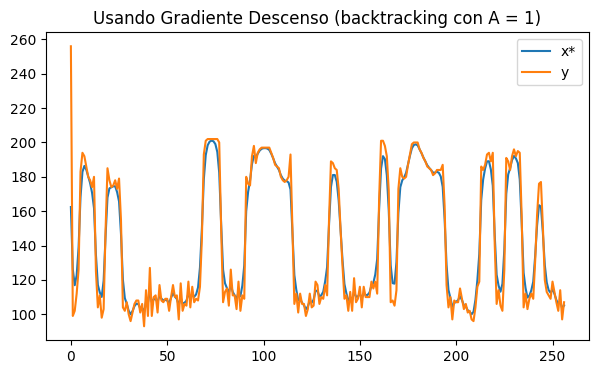

In [36]:
def show_table():
    xk = np.random.rand(257)  # Vector x de ejemplo
    y = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/yk .txt', delimiter=",")

    K_max = 10000
    t_g = 0.00001
    a = 1     #Alpha entre [0,1]
    p = 0.5   #Rho entre [0,1]
    c1 = 0.01 #C1 entre [0,1]
    A = 1
    case = 4

    #paso = "Grad_Hess"
    paso = "backtracking"

    datos_optimizacion, tabla_completa = descenso_gradiente(xk, fd, gd, hd, t_g, K_max, case, paso,a,p,c1, y, A)
    print("\n")
    df = pd.concat([tabla_completa.head(3), tabla_completa.tail(3)])
    tabla = tabulate(df, headers="keys", tablefmt="pipe", showindex=False, floatfmt=".7f")
    print(tabla)


    print("\n")
    plt.plot(tabla_completa['k'], tabla_completa['||∇f(x_k)||'], marker='o', linestyle='--', color='indigo')
    plt.title('Norma del Gradiente respecto a k')
    plt.legend()
    plt.grid(False)
    plt.show()

    print(" ")
    print("\n")
    grafica(datos_optimizacion, y, "Usando Gradiente Descenso (backtracking con A = 1)")

show_table()

# Gradiente Descenso (backtracking con $λ$ = 100)



|            k |   ||X_K+1 - X_K|| |   ||∇f(x_k)|| |          f(x_k) |
|-------------:|------------------:|--------------:|----------------:|
|    0.0000000 |        81.7784100 |  5233.8182412 | 5567903.9207701 |
|    1.0000000 |        43.4804454 | 22261.9880544 | 5561708.1800161 |
|    2.0000000 |        20.8409082 | 10670.5450229 | 5250478.6273179 |
| 2368.0000000 |         0.0008130 |     0.4162799 |  297742.6063855 |
| 2369.0000000 |         0.0008099 |     0.4146550 |  297742.5753990 |
| 2370.0000000 |         0.0008067 |     0.4130364 |  297742.5445345 |




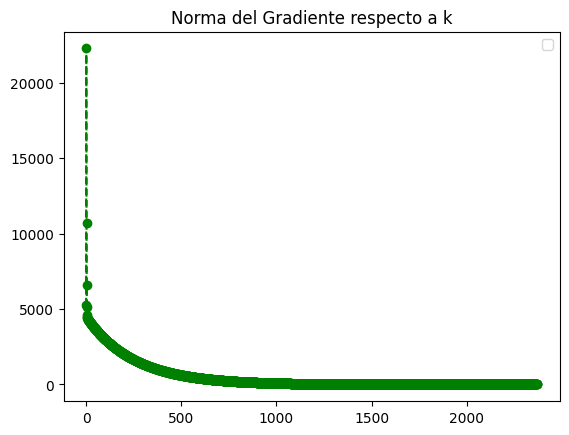

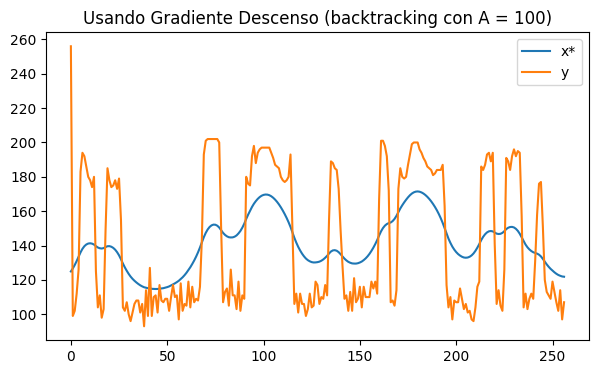

In [38]:
def show_table():
    xk = np.random.rand(257)  # Vector x de ejemplo
    y = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/yk .txt', delimiter=",")

    K_max = 10000

    t_g = 0.41
    a = 1     #Alpha entre [0,1]
    p = 0.5   #Rho entre [0,1]
    c1 = 0.01 #C1 entre [0,1]
    A = 100
    case = 4

    #paso = "Grad_Hess"
    paso = "backtracking"

    datos_optimizacion, tabla_completa = descenso_gradiente(xk, fd, gd, hd, t_g, K_max, case, paso,a,p,c1, y, A)
    print("\n")
    df = pd.concat([tabla_completa.head(3), tabla_completa.tail(3)])
    tabla = tabulate(df, headers="keys", tablefmt="pipe", showindex=False, floatfmt=".7f")
    print(tabla)


    print("\n")
    plt.plot(tabla_completa['k'], tabla_completa['||∇f(x_k)||'], marker='o', linestyle='--', color='green')
    plt.title('Norma del Gradiente respecto a k')
    plt.legend()
    plt.grid(False)
    plt.show()

    print(" ")
    print("\n")
    grafica(datos_optimizacion, y, "Usando Gradiente Descenso (backtracking con A = 100)")

show_table()

# Gradiente Descenso (backtracking con $λ$ = 1000)



|             k |   ||X_K+1 - X_K|| |   ||∇f(x_k)|| |          f(x_k) |
|--------------:|------------------:|--------------:|----------------:|
|     0.0000000 |         5.5753670 | 22836.7033597 | 5607630.2741964 |
|     1.0000000 |         4.0619740 | 16637.8454609 | 5578005.1511583 |
|     2.0000000 |         3.5283702 | 14452.2044825 | 5567179.2722570 |
| 20178.0000000 |         0.0000587 |     0.2404417 |  372087.6891974 |
| 20179.0000000 |         0.0000587 |     0.2403243 |  372087.6880938 |
| 20180.0000000 |         0.0000586 |     0.2402070 |  372087.6869907 |




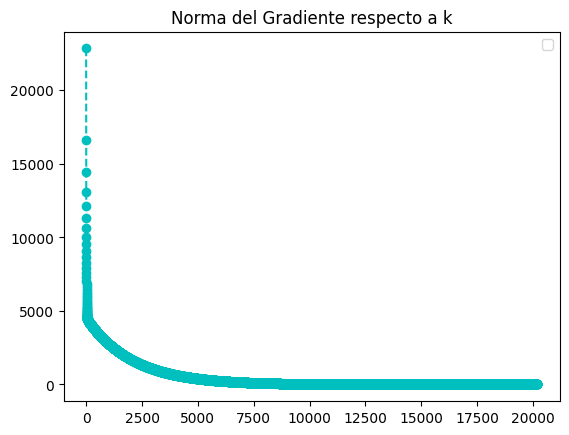

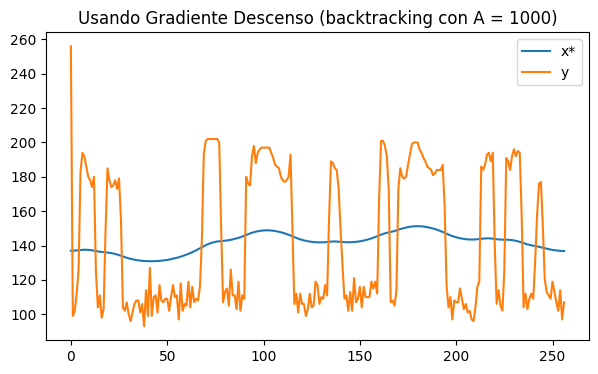

In [39]:
def show_table():
    xk = np.random.rand(257)  # Vector x de ejemplo
    y = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/yk .txt', delimiter=",")

    K_max = 10000
    t_g = 0.24
    a = 1     #Alpha entre [0,1]
    p = 0.5   #Rho entre [0,1]
    c1 = 0.01 #C1 entre [0,1]
    A = 1000
    case = 4

    #paso = "Grad_Hess"
    paso = "backtracking"

    datos_optimizacion, tabla_completa = descenso_gradiente(xk, fd, gd, hd, t_g, K_max, case, paso,a,p,c1, y, A)
    print("\n")
    df = pd.concat([tabla_completa.head(3), tabla_completa.tail(3)])
    tabla = tabulate(df, headers="keys", tablefmt="pipe", showindex=False, floatfmt=".7f")
    print(tabla)


    print("\n")
    plt.plot(tabla_completa['k'], tabla_completa['||∇f(x_k)||'], marker='o', linestyle='--', color='c')
    plt.title('Norma del Gradiente respecto a k')
    plt.legend()
    plt.grid(False)
    plt.show()

    print(" ")
    print("\n")
    grafica(datos_optimizacion, y, "Usando Gradiente Descenso (backtracking con A = 1000)")

show_table()

# <center> **Final**

---

